# Blood Pressure

In a small dose-finding study of a blood pressure reducing drug, 40 high blood pressure patients (systolic blood pressure at least 150 mmHg) were randomised over 4 concentrations of the active compound (arginine) in the drug: 0, 2, 5 and 10 mg per day. The outcome is the systolic blood pressure reduction after 2 months, measured in mmHg.




## 0. Data reading and calling libraries

In [24]:
# install.packages("car")
# install.packages("report")

library(ggplot2)
library(car)
library(report)


load("BloodPressure.RData")
head(BloodPressure)


,dose,bp.reduction,gender
,<dbl>,<dbl>,<int>
1,0,3,0
2,0,5,0
3,0,-2,0
4,0,-5,1
5,0,0,0
6,0,5,0


## 1. Descriptive statistics




### 1.1 Summarizing your data and calculate the following: mean, median, minimum, maximum, first and third quartile (for each variable).

In [25]:
summary(BloodPressure)



      dose        bp.reduction        gender    
 Min.   : 0.00   Min.   :-8.000   Min.   :0.00  
 1st Qu.: 1.50   1st Qu.: 2.750   1st Qu.:0.00  
 Median : 3.50   Median : 6.500   Median :0.00  
 Mean   : 4.25   Mean   : 7.625   Mean   :0.45  
 3rd Qu.: 6.25   3rd Qu.:13.000   3rd Qu.:1.00  
 Max.   :10.00   Max.   :26.000   Max.   :1.00  

In [26]:
mean(BloodPressure$bp.reduction)


[1] 7.625

In [27]:
median(BloodPressure$bp.reduction)

[1] 6.5

In [28]:
min(BloodPressure$bp.reduction)

[1] -8

In [29]:
max(BloodPressure$bp.reduction)

[1] 26

In [30]:
print("First and Second quantile")
quan <- quantile(BloodPressure$bp.reduction, c(0.25, 0.75))
quan


[1] "First and Second quantile"


25%   75% 
 2.75 13.00

### 1.2 For the categorical variable (Gender)



In [31]:
BloodPressure$gender <- factor(BloodPressure$gender, levels = c(0, 1), labels = c("Female", "Male"))
table(BloodPressure$gender)



Female   Male 
    22     18 

In [32]:
# Counting number of doses in the study using table()
table(BloodPressure$dose)


 0  2  5 10 
10 10 10 10 

### 1.3 Calculating the correlation of bp.reduction and dose



In [33]:
cor(BloodPressure$bp.reduction, BloodPressure$dose)



[1] 0.8594944

## 2. Graphics




### 2.1 Generating a bar chart of a categorical variable for the gender.

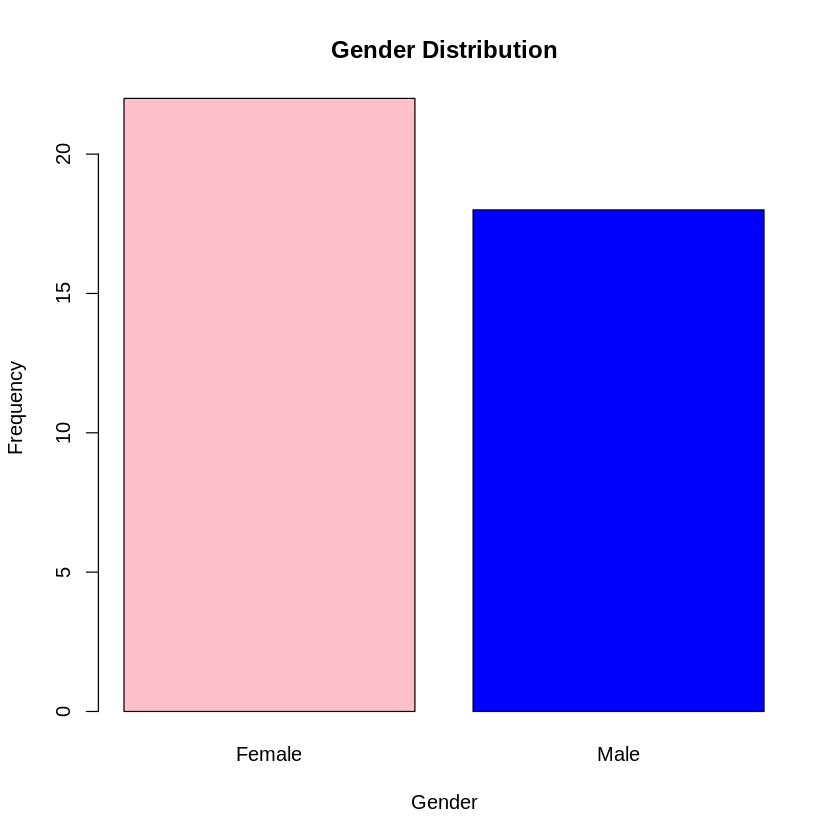

In [34]:
barplot(table(BloodPressure$gender), main = "Gender Distribution", xlab = "Gender", ylab = "Frequency",col=c("pink","blue"))



### 2.2 Generating a bar chart graph with mean bp.reduction in males and females



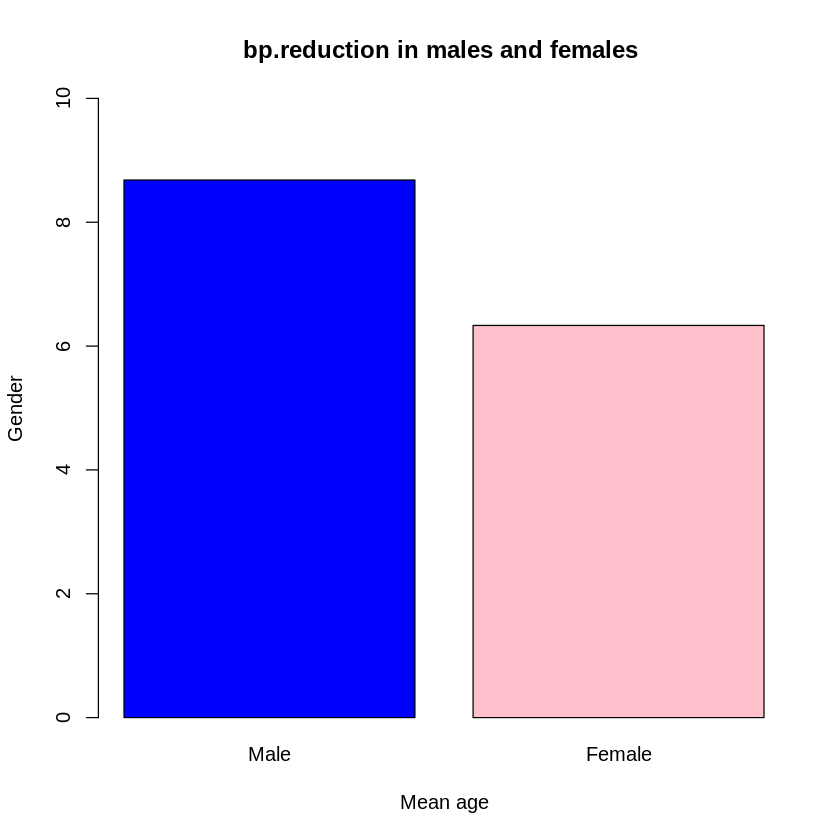

In [35]:
barplot(tapply(BloodPressure$bp.reduction, BloodPressure$gender, mean), main = "bp.reduction in males and females ", xlab = "Mean age", names = c("Male", "Female"), ylab = "Gender",col=c("blue","pink"),ylim=c(0,10))



### 2.3 Making a histogram of a continuous variable "Dose", "bp.reduction".



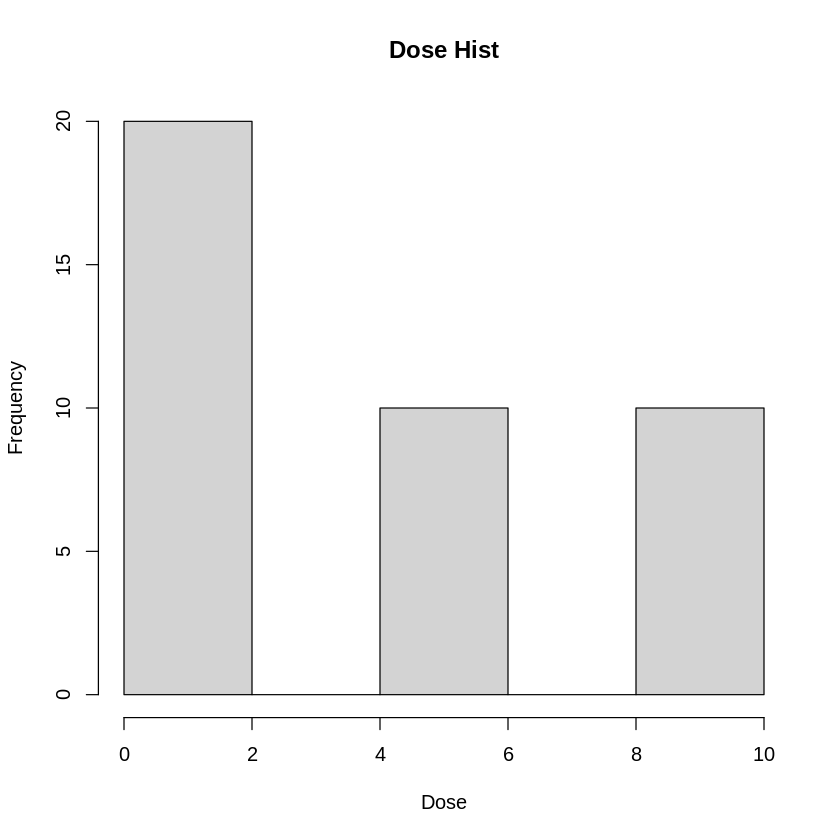

In [36]:
hist(BloodPressure$dose, main = "Dose Hist", xlab = "Dose")


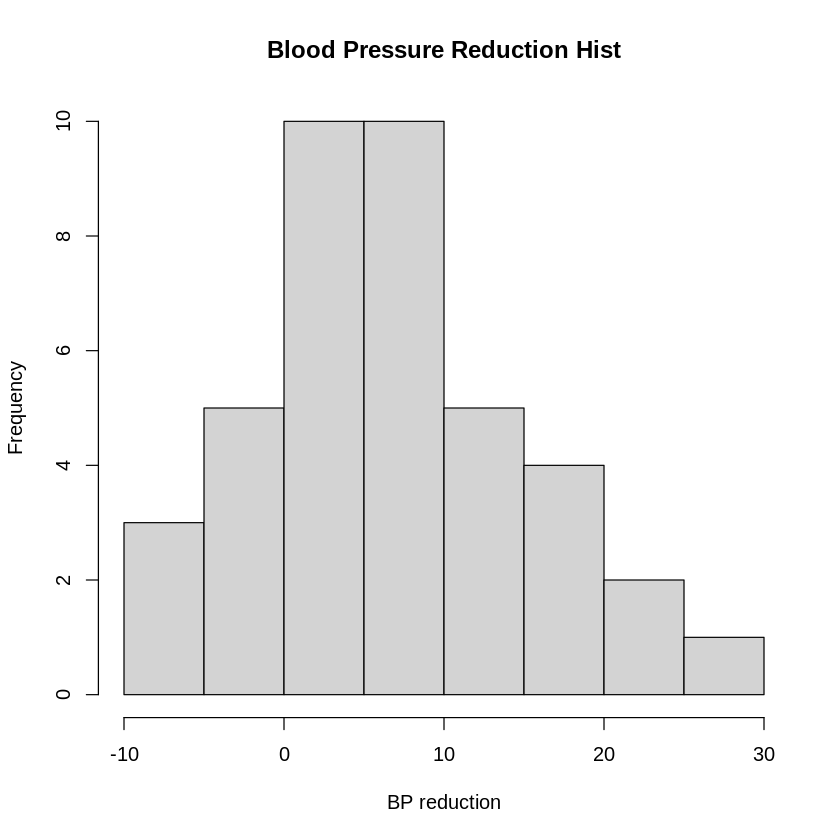

In [37]:
hist(BloodPressure$bp.reduction, main = "Blood Pressure Reduction Hist", xlab = "BP reduction")

### 2.4 Making a scatterplot of 2 continuous variables Dose and bp.reduction, and add the regression lines for each gender



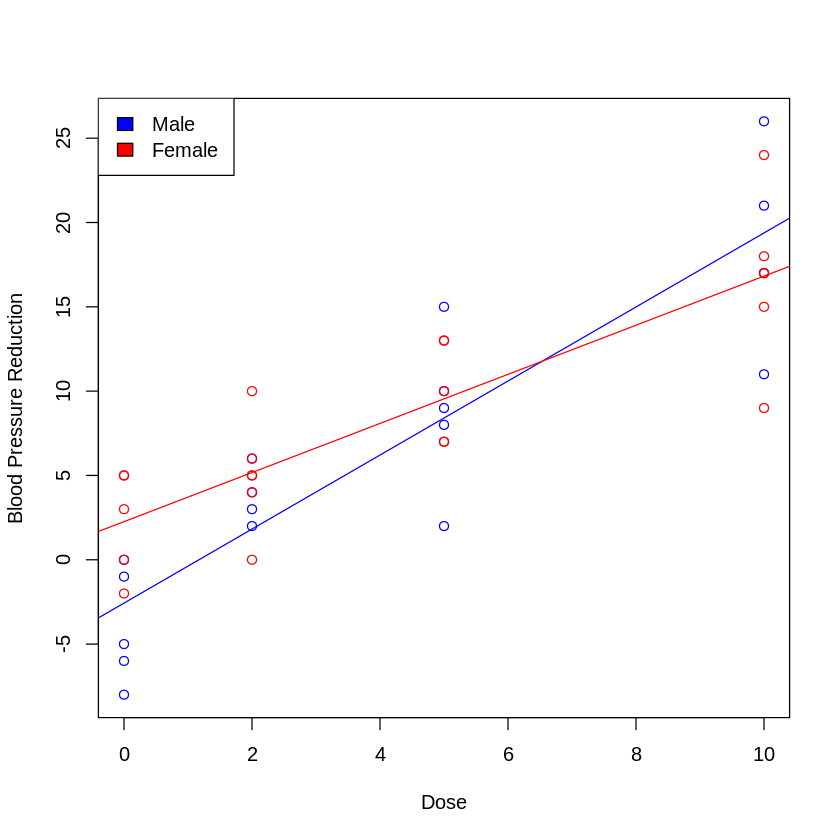

In [38]:
plot(bp.reduction[gender == "Male"]~ dose[gender == "Male"], data = BloodPressure, col= "blue", xlab = "Dose", ylab = "Blood Pressure Reduction")
points(bp.reduction[gender == "Female"]~ dose[gender == "Female"], data = BloodPressure, col = "red")
abline(lm(bp.reduction[gender == "Male"]~ dose[gender == "Male"], data = BloodPressure), col= "blue")
abline(lm(bp.reduction[gender == "Female"]~ dose[gender == "Female"], data = BloodPressure), col= "red")

legend("topleft", legend = c("Male", "Female"), fill = c("blue", "red"), cex = 1)


### 2.5 Making a boxplot of bloodpressure reduction and a separate boxplots per Doses (as.factors).



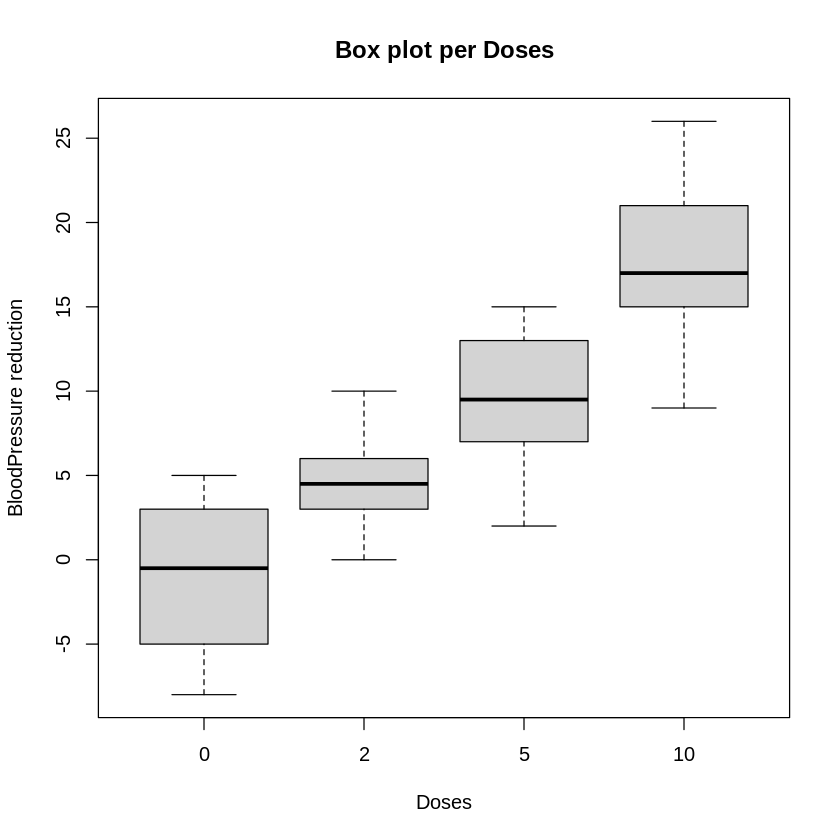

In [39]:
boxplot(BloodPressure$bp.reduction~as.factor(BloodPressure$dose), xlab = "Doses", ylab = "BloodPressure reduction", main = "Box plot per Doses")



## 3. Outlier detection




### 3.1 Exploring the data for any existing outliers, identify them (do NOT remove them if found).

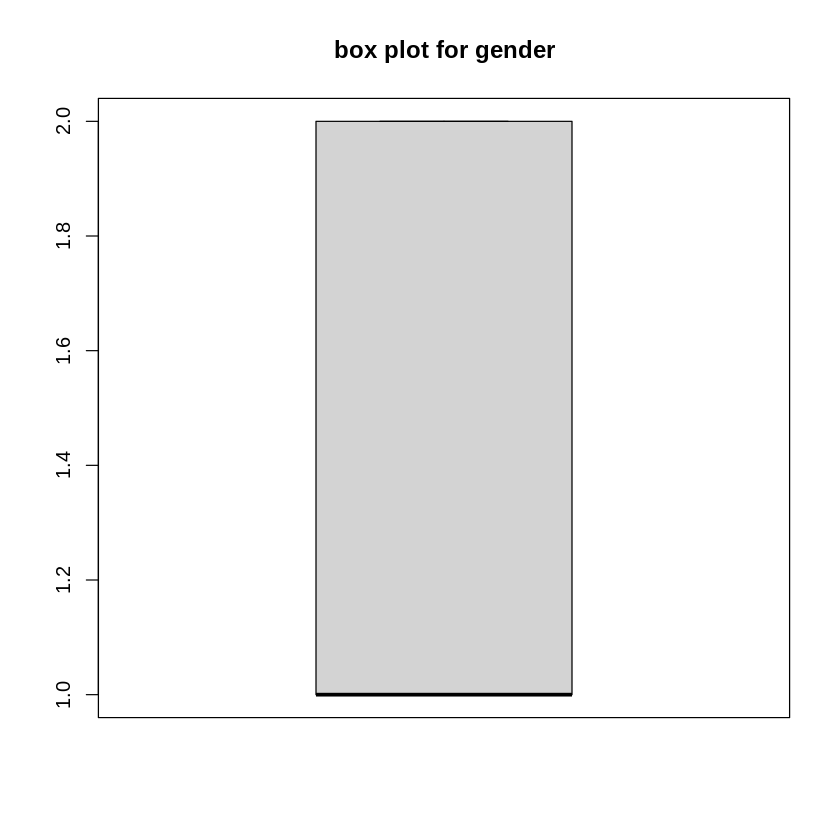

In [40]:
boxplot(BloodPressure$gender, main = "box plot for gender")


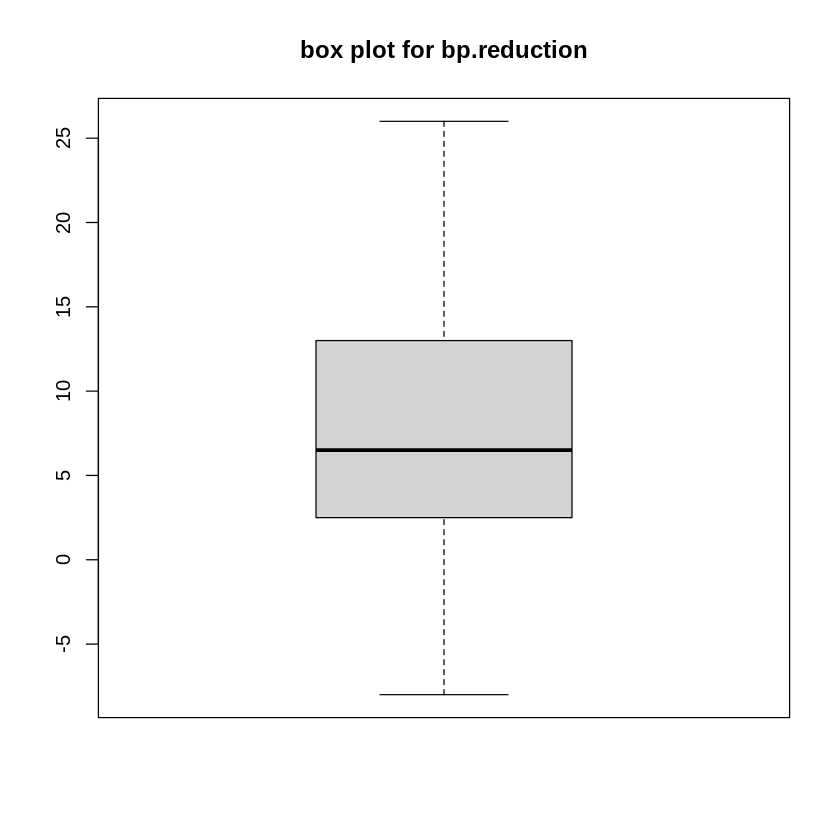

In [41]:
boxplot(BloodPressure$bp.reduction, main = "box plot for bp.reduction")

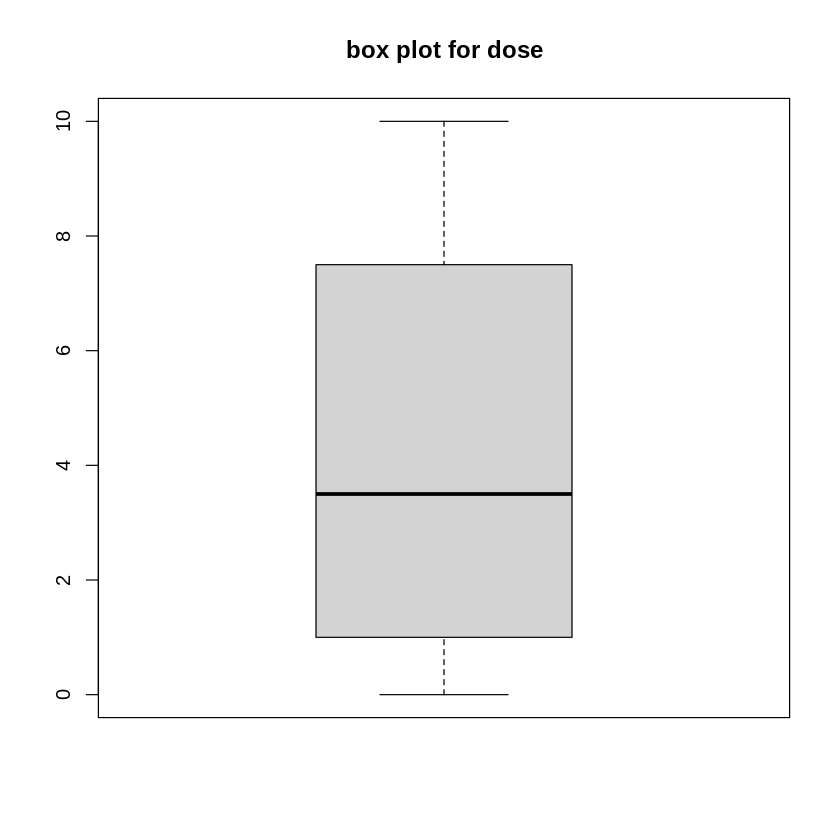

In [42]:
boxplot(BloodPressure$dose, main = "box plot for dose")

### 3.2 What do you think?

There are no outliers, Which means that, within our dataset, there are no extreme or unusual values that stand out from the rest of the data. In other words, all the data points are relatively consistent and do not exhibit any remarkable deviations.






## 4. Testing for normality/ homoscedasticity

### 4.1 Checking the normality using two methods

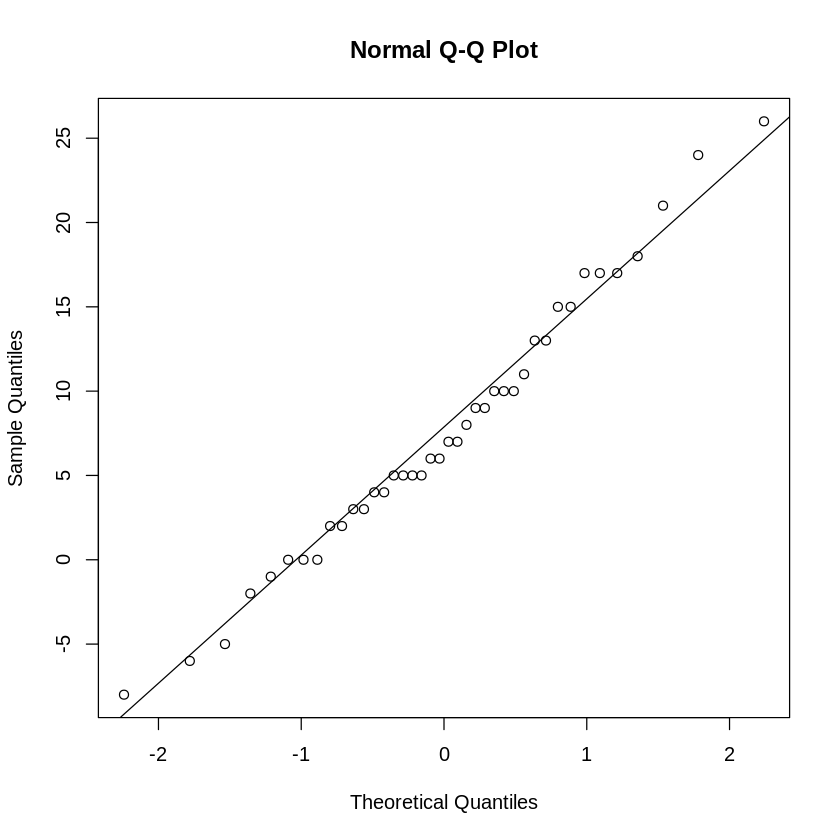

In [43]:
qqnorm(BloodPressure$bp.reduction)
qqline(BloodPressure$bp.reduction)


In [44]:
shapiro.test(BloodPressure$bp.reduction) #0.806

# there is no significant difference so we cannot reject the null hypothesis (normality)


	Shapiro-Wilk normality test

data:  BloodPressure$bp.reduction
W = 0.98321, p-value = 0.806


### 4.2 Checking the homoscedasticity using two methods.



In [45]:
leveneTest(BloodPressure$bp.reduction, BloodPressure$dose)


Warning message in leveneTest.default(BloodPressure$bp.reduction, BloodPressure$dose):
“BloodPressure$dose coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.9517159,0.425965
,36,NA,NA


In [46]:
bartlett.test(BloodPressure$bp.reduction, BloodPressure$dose)

# there is no significant difference so we cannot reject the null hypothesis (homoscedasticity)


	Bartlett test of homogeneity of variances

data:  BloodPressure$bp.reduction and BloodPressure$dose
Bartlett's K-squared = 3.9235, df = 3, p-value = 0.2698


### 4.3 What do you think?

As in the qq plot or the shapiro test the data is normally distributed p value = 0.806. Therefore, there is no significant difference, we dont have enough evidence to reject the null hypothosis which is the normallity and according to bartlett test we cannot reject the null hypothesis(homoscedasticity)




## 5. Statistical Inference



### 5.1 Calculating the 90%, 95%, 99% confidence interval for the means of bp.reduction per each Dose.

In [47]:
BloodPressure$dose <- factor(BloodPressure$dose, labels = c("dose_0", "dose_2","dose_5","dose_10"))

#90%
confint(lm(bp.reduction~dose, data = BloodPressure), level = 0.90)


,5 %,95 %
(Intercept),-3.116148,1.316148
dosedose_2,2.265894,8.534106
dosedose_5,7.165894,13.434106
dosedose_10,15.265894,21.534106


In [48]:
#95%
confint(lm(bp.reduction~dose, data = BloodPressure))

,2.5 %,97.5 %
(Intercept),-3.562182,1.762182
dosedose_2,1.635106,9.164894
dosedose_5,6.535106,14.064894
dosedose_10,14.635106,22.164894


In [49]:
#99%
confint(lm(bp.reduction~dose, data = BloodPressure), level = 0.99)

,0.5 %,99.5 %
(Intercept),-4.4697372,2.669737
dosedose_2,0.3516292,10.448371
dosedose_5,5.2516292,15.348371
dosedose_10,13.3516292,23.448371


### 5.2 How would you describe those inferences and what do you observe in terms of the interval width when request higher confidence (i.e. 99% C.I.)?

Ans: A confidence interval is an estimated range of values that, with a given level of certainty, contain the real population parameter. As we request higher confidence intervals the intervals shrink and get more accurate.




## 6. Hypothesis testing



### 6.1 We hypothesis that bp.reduction is different between male vs female (in the group that received placebo, i.e. Dose = 0).Assuming normality and homoscedasticity, can you test this hypothesis using statistical hypothesis framework

In [50]:
# Null hypothesis: bp.reduction is no different between male vs female (in the group that received placebo, i.e. Dose = 0)
# Alternative hypothesis: bp.reduction is different between male vs female (in the group that received placebo, i.e. Dose = 0)

t.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"] ~ BloodPressure$gender[BloodPressure$dose == "dose_0"], var.equal = T)



	Two Sample t-test

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"] by BloodPressure$gender[BloodPressure$dose == "dose_0"]
t = 3.011, df = 8, p-value = 0.01679
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
  1.451647 10.948353
sample estimates:
mean in group Female   mean in group Male 
                 2.2                 -4.0 


In [51]:
#	Assessing whether the previous assumptions have been meet for the test.

shapiro.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" & BloodPressure$gender=="Female"])



	Shapiro-Wilk normality test

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" & BloodPressure$gender == "Female"]
W = 0.88482, p-value = 0.3317


In [52]:
shapiro.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" & BloodPressure$gender=="Male"])



	Shapiro-Wilk normality test

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" & BloodPressure$gender == "Male"]
W = 0.92525, p-value = 0.5644


In [53]:
leveneTest(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]~BloodPressure$gender[BloodPressure$dose=="dose_0"])


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.02631579,0.875154
,8,NA,NA


In [54]:
bartlett.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]~BloodPressure$gender[BloodPressure$dose=="dose_0"])



	Bartlett test of homogeneity of variances

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"] by BloodPressure$gender[BloodPressure$dose == "dose_0"]
Bartlett's K-squared = 0.025725, df = 1, p-value = 0.8726


In [55]:
var.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]~BloodPressure$gender[BloodPressure$dose=="dose_0"])



	F test to compare two variances

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"] by BloodPressure$gender[BloodPressure$dose == "dose_0"]
F = 0.84348, num df = 4, denom df = 4, p-value = 0.8729
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.08782088 8.10121216
sample estimates:
ratio of variances 
         0.8434783 


In [56]:
# Ans: According to the p value = 0.01679 we can reject the null hypothesis therefore, there is a significant difference between males and females in dose = 0
# the assumption is correct

### 6.2 We hypothesis that bp.reduction is "higher" in the group receiving Dose = 10 compared to the control (Dose =0). Can you test this hypothesis assuming heteroscedasiticy



In [57]:
#Null hypothesis: there no differenece between blood pressure reduction taking dose 10 or dose 0 both are same
# Alternative hypothesis: bp.reduction is “higher” in the group receiving Dose = 10 compared to the control (Dose =0)

results <- t.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"], var.equal = F)
results



	Welch Two Sample t-test

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"] and BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"]
t = -8.4238, df = 17.565, p-value = 1.403e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22.99718 -13.80282
sample estimates:
mean of x mean of y 
     -0.9      17.5 


In [58]:
mean_diff <- results$estimate
# Print the mean difference
print(mean_diff)

mean of x mean of y 
     -0.9      17.5 


In [59]:
#	Assessing the previous test assumption
shapiro.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"])


	Shapiro-Wilk normality test

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"]
W = 0.95916, p-value = 0.7763


In [60]:
shapiro.test( BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"])


	Shapiro-Wilk normality test

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]
W = 0.94538, p-value = 0.6143


In [61]:
leveneTest(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" ], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"])


Warning message in leveneTest.default(BloodPressure$bp.reduction[BloodPressure$dose == :
“BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"] coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,7,0.1,0.991127
,2,NA,NA


In [62]:
var.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"])



	F test to compare two variances

data:  BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"] and BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"]
F = 0.72797, num df = 9, denom df = 9, p-value = 0.6439
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1808169 2.9307941
sample estimates:
ratio of variances 
         0.7279678 


In [63]:
bartlett.test(list(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"]))


	Bartlett test of homogeneity of variances

data:  list(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"])
Bartlett's K-squared = 0.21398, df = 1, p-value = 0.6437


In [64]:
#   Our data is normal and homoscedastic, therefore, our assumption is wrong we should use (Two Sample T Test)

### 6.3 We hypothesis that bp.reduction is different between the different doses (ignoring the gender). Can you perform comparison between the different groups, after assessing the assumptions and performing post-hoc testing.



In [65]:
# Null Hypothesis: bp.reduction is the same between the different doses
# Alternative Hypothesis: bp.reduction is different between the different doses

shapiro_test <- by(BloodPressure$bp.reduction, BloodPressure$dose, shapiro.test)
shapiro_test


BloodPressure$dose: dose_0

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.94538, p-value = 0.6143

------------------------------------------------------------ 
BloodPressure$dose: dose_2

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95757, p-value = 0.7578

------------------------------------------------------------ 
BloodPressure$dose: dose_5

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95795, p-value = 0.7623

------------------------------------------------------------ 
BloodPressure$dose: dose_10

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95916, p-value = 0.7763


In [66]:
levene_test <- leveneTest(bp.reduction ~ dose, data = BloodPressure)
levene_test

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.9517159,0.425965
,36,NA,NA


In [67]:
anov <- aov(bp.reduction ~ dose, data = BloodPressure)
report(anov)

The ANOVA (formula: bp.reduction ~ dose) suggests that:

  - The main effect of dose is statistically significant and large (F(3, 36) =
35.42, p < .001; Eta2 = 0.75, 95% CI [0.61, 1.00])

Effect sizes were labelled following Field's (2013) recommendations.

In [68]:
anova_summary <- summary(anov)
SSE <- anova_summary$`Residuals`$SumSq
SSE

NULL

In [69]:
# Assuming you have an ANOVA summary stored in the 'anova_summary' object
SSR <- anova_summary$`Model`$SumSq
SSR

NULL

In [70]:
posthoc <- TukeyHSD(anov)
posthoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = bp.reduction ~ dose, data = BloodPressure)

$dose
               diff         lwr       upr     p adj
dose_2-dose_0   5.4  0.40037278 10.399627 0.0300758
dose_5-dose_0  10.3  5.30037278 15.299627 0.0000161
dose_10-dose_0 18.4 13.40037278 23.399627 0.0000000
dose_5-dose_2   4.9 -0.09962722  9.899627 0.0564941
dose_10-dose_2 13.0  8.00037278 17.999627 0.0000002
dose_10-dose_5  8.1  3.10037278 13.099627 0.0005742


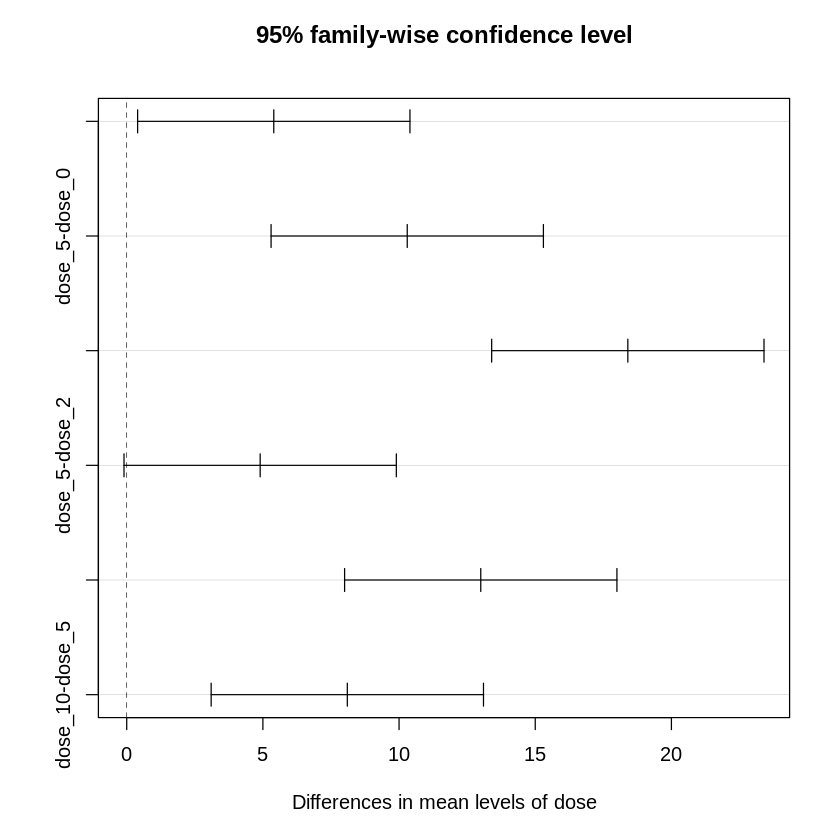

In [71]:
plot(posthoc)

In [72]:
# After assessing that our data is normal and homoscedastic we perform posthoc (TuckeyHSD) as the output shows that there is a significant difference in all combinations except the dose_5 – dose_2 were its p value is greater than 0.05.
#Therefore, we have enough evidence to reject the null

## 7. Linear model




### 7.1 Fiting a linear regression to the data and interpret the regression coefficient (for the same hypotheses mentioned above)

In [73]:
#reseting our data reading
load("BloodPressure.RData")

res <- lm(bp.reduction ~ dose, BloodPressure)
report(res)

We fitted a linear model (estimated using OLS) to predict bp.reduction with
dose (formula: bp.reduction ~ dose). The model explains a statistically
significant and substantial proportion of variance (R2 = 0.74, F(1, 38) =
107.44, p < .001, adj. R2 = 0.73). The model's intercept, corresponding to dose
= 0, is at 0.03 (95% CI [-1.95, 2.01], t(38) = 0.03, p = 0.973). Within this
model:

  - The effect of dose is statistically significant and positive (beta = 1.79,
95% CI [1.44, 2.14], t(38) = 10.37, p < .001; Std. beta = 0.86, 95% CI [0.69,
1.03])

Standardized parameters were obtained by fitting the model on a standardized
version of the dataset. 95% Confidence Intervals (CIs) and p-values were
computed using a Wald t-distribution approximation.

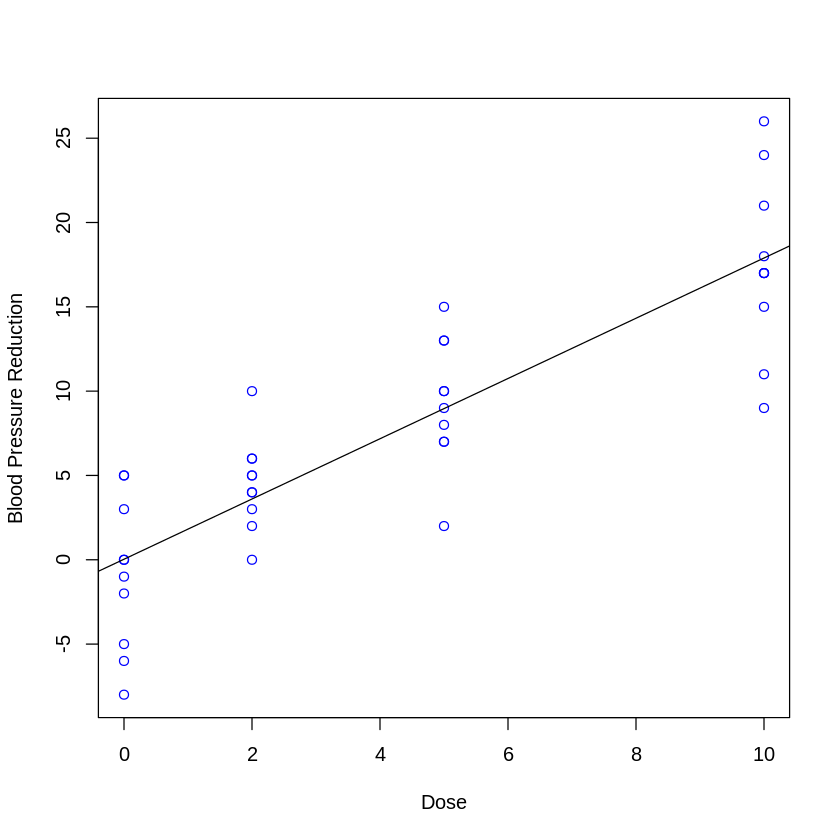

In [74]:
plot(BloodPressure$dose, BloodPressure$bp.reduction, ylab = "Blood Pressure Reduction", xlab = "Dose", col = "Blue")
abline(res)

### 7.2 Calculating and interpret a 95% confidence interval of the regression slope



In [75]:
# Extracting the coefficient summary
summary_coef <- summary(res)$coefficients
summary_coef


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.03303965,0.9786767,0.03375951,9.732456e-01
dose,1.78634361,0.1723354,10.36550870,1.247000e-12


In [76]:
# Extracting the estimated slope and its standard error
slope <- summary_coef["dose", "Estimate"]
SEb <- summary_coef["dose", "Std. Error"]
# Calculating the t-value for the desired confidence level
t_value <- qt(0.975, df = res$df.residual)
t_value

[1] 2.024394

In [77]:
# Calculating the confidence interval for the slope
lower_bound <- slope - t_value * SEb
upper_bound <- slope + t_value * SEb

# Printing the confidence interval
cat("95% Confidence Interval for the Regression Slope:", "\n")

95% Confidence Interval for the Regression Slope: 


In [78]:
cat("Lower Bound:", lower_bound, "\n")

Lower Bound: 1.437469 


In [79]:
cat("Upper Bound:", upper_bound, "\n")

Upper Bound: 2.135218 


In [80]:
confint(res, 'dose', level=0.95)

,2.5 %,97.5 %
dose,1.437469,2.135218


### 7.3 Estimating the average blood pressure reduction for patients that would receive 3mg/day of the medication.



In [81]:
predict(res,newdata=data.frame(dose=3), interval="prediction",level=0.95)



,fit,lwr,upr
1,5.39207,-3.033452,13.81759
